# 

In [77]:
# THe hindu news
import warnings
warnings.filterwarnings('ignore')
from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
from newspaper import Article
from tqdm import tqdm
import matplotlib.pyplot as plt
from textblob import TextBlob
import datefinder
import datetime
from nltk.tokenize import word_tokenize 


In [2]:
url = 'https://timesofindia.indiatimes.com'
links = []
response = requests.get(url)

soup = BeautifulSoup(response.text, 'lxml')


In [3]:
# Fetch Headline
headline = soup.find('div', {'id':'featuredstory'})

headline = url+headline.find('a')['href']

print (headline)
links.append(headline)

https://timesofindia.indiatimes.com/india/coronavirus-india-updates-live-total-covid-19-cases-in-india-29435-deaths-934/liveblog/75418221.cms


In [5]:
# TO find stop stories
top_stories = soup.find('div', {'class': 'top-story'})
stories = (top_stories.find_all('li'))


for story in stories:
    if not story.find('a')['href'].startswith('http'):
        links.append(url+story.find('a')['href'])
    #link.append(st)


In [6]:
# Latest News
latest_stories = soup.find('div', {'class':'latestNewContainer'})

#print (latest_stories)
stories = (latest_stories.select('a[pg*=Latest_News]'))
print (len(stories)) 
for story in stories:
    if not story['href'].startswith('http'):
        links.append(url+story['href'])

24


In [7]:
# News with images
table = soup.findAll('a', attrs = {'class':'w_img'})


for row in table: 
    if not row['href'].startswith('http'):
        links.append(url+row['href'])

In [8]:
links

['https://timesofindia.indiatimes.com/india/coronavirus-india-updates-live-total-covid-19-cases-in-india-29435-deaths-934/liveblog/75418221.cms',
 'https://timesofindia.indiatimes.com/city/mumbai/virus-has-mutated-into-10-types-one-now-dominant-across-regions-study/articleshow/75417399.cms',
 'https://timesofindia.indiatimes.com/india/be-ready-to-woo-companies-quitting-china-pm-modi/articleshow/75418023.cms',
 'https://timesofindia.indiatimes.com/india/in-13-states-cases-growing-slower-than-national-average/articleshow/75423661.cms',
 'https://timesofindia.indiatimes.com/sports/cricket/ipl/top-stories/ms-dhonis-india-comeback-not-dependent-on-ipl-aakash-chopra/articleshow/75425749.cms',
 'https://timesofindia.indiatimes.com/india/sc-asks-centre-to-consider-adopting-one-nation-one-ration-card-scheme-during-lockdown/articleshow/75424806.cms',
 'https://timesofindia.indiatimes.com/city/ahmedabad/covid-19-ahmedabads-death-rate-is-higher-than-mumbai-delhi/articleshow/75418745.cms',
 'https:

In [9]:
print (len(links))
links = list(set(links))
len(links)

60


55

In [55]:
# https://medium.com/@aryan212verma/online-news-crawling-and-virality-prediction-bbe81585c326
from datetime import date 
def day(article_text):
    article=article_text
    if len(list(datefinder.find_dates(article)))>0:
        date=str(list(datefinder.find_dates(article))[0])
        date=date.split()
        date=date[0]
        year, month, day = date.split('-')     
        day_name = datetime.date(int(year), int(month), int(day)) 
        return day_name.strftime("%A")
    return "Monday"

In [78]:
pos_words=[]
neg_words=[]
def polar(words):
    all_tokens=  word_tokenize(words) 
    for i in all_tokens:
        analysis=TextBlob(i)
        polarity=analysis.sentiment.polarity
        if polarity>0:
            pos_words.append(i)
        if polarity<0:
            neg_words.append(i)
    return pos_words,neg_words

In [79]:
# https://medium.com/@aryan212verma/online-news-crawling-and-virality-prediction-bbe81585c326
def rates(words):
    words=polar(words)
    pos=words[0]
    neg=words[1]
    all_words=words
    global_rate_positive_words=(len(pos)/len(all_words))/100
    global_rate_negative_words=(len(neg)/len(all_words))/100
    pol_pos=[]
    pol_neg=[]
    for i in pos:
        analysis=TextBlob(i)
        pol_pos.append(analysis.sentiment.polarity)
        avg_positive_polarity=analysis.sentiment.polarity
    for j in neg:
        analysis2=TextBlob(j)
        pol_neg.append(analysis2.sentiment.polarity)
        avg_negative_polarity=analysis2.sentiment.polarity
    min_positive_polarity=min(pol_pos)
    max_positive_polarity=max(pol_pos)
    min_negative_polarity=min(pol_neg)
    max_negative_polarity=max(pol_neg)
    avg_positive_polarity=np.average(pol_pos)
    avg_negative_polarity=np.average(pol_neg)
    return global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity

### Feature Engineering

In [81]:
df=[]
for i in tqdm(links):
    #print (i)
    article = Article(i, language="en")
    article.download() 
    article.parse() 
    article.nlp() 
    analysis=TextBlob(article.text)
    data={}
    data['link'] = i
    data['Title']=article.title
    data['Text']=article.text
    data['Summary']=article.summary
    data['Keywords']=article.keywords
    data['num_imgs'] = len(article.images)
    data['num_videos']=len(article.movies)
    data['num_keywords']=len(article.keywords)
    length = []
    for w in article.keywords:
        length.append(len(w))
    data['average_token_length'] = np.average(length)
    
    if "life-style" in article.url:
        data['data_channel_is_lifestyle']=1
    else:
        data['data_channel_is_lifestyle']=0
    if "etimes" in article.url:
        data['data_channel_is_entertainment']=1
    else:
        data['data_channel_is_entertainment']=0
    if "business" in article.url:
        data['data_channel_is_bus']=1
    else:
        data['data_channel_is_bus']=0
    if "social media" or "facebook" or "whatsapp" in article.text.lower():
        data_channel_is_socmed=1
        data_channel_is_tech=0
        data_channel_is_world=0
    else:
        data_channel_is_socmed=0
    if ("technology" or "tech" in article.text.lower()) or ("technology" or "tech" in article.url):
        data_channel_is_tech=1
        data_channel_is_socmed=0
        data_channel_is_world=0
    else:
        data_channel_is_tech=0
    if "world" in article.url:
        data_channel_is_world=1
        data_channel_is_tech=0
        data_channel_is_socmed=0
    else:
        data_channel_is_world=0

    data['data_channel_is_socmed']=data_channel_is_socmed
    data['data_channel_is_tech']=data_channel_is_tech
    data['data_channel_is_world']=data_channel_is_world
    
    if day(i)=="Monday":
        data['weekday_is_monday']=1
    else:
        data['weekday_is_monday']=0
    if day(i)=="Tuesday":
        data['weekday_is_tuesday']=1
    else:
        data['weekday_is_tuesday']=0
    if day(i)=="Wednesday":
        data['weekday_is_wednesday']=1
    else:
        data['weekday_is_wednesday']=0
    if day(i)=="Thursday":
        data['weekday_is_thursday']=1
    else:
        data['weekday_is_thursday']=0
    if day(i)=="Friday":
        data['weekday_is_friday']=1
    else:
        data['weekday_is_friday']=0
    if day(i)=="Saturday":
        data['weekday_is_saturday']=1
        data['is_weekend']=1
    else:
        data['weekday_is_saturday']=0
    if day(i)=="Sunday":
        data['weekday_is_sunday']=1
        data['is_weekend']=1
    else:
        data['weekday_is_sunday']=0
        data['is_weekend']=0

    data['global_subjectivity']=analysis.sentiment.subjectivity
    data['global_sentiment_polarity']=analysis.sentiment.polarity
    
    data['global_rate_positive_words']=rates(article.text)[0]
    data['global_rate_negative_words']=rates(article.text)[1]
    data['avg_positive_polarity']=rates(article.text)[2]
    data['min_positive_polarity']=rates(article.text)[3]
    data['max_positive_polarity']=rates(article.text)[4]
    data['avg_negative_polarity']=rates(article.text)[5]
    data['min_negative_polarity']=rates(article.text)[6]
    data['max_negative_polarity']=rates(article.text)[7]    
    data['title_subjectivity']=TextBlob(article.title).sentiment.subjectivity
    data['title_sentiment_polarity']=TextBlob(article.title).sentiment.polarity
    
    df.append(data)

100%|██████████████████████████████████████████████████████████████████████████████████| 55/55 [10:09<00:00, 11.08s/it]


In [82]:
news_data = pd.DataFrame(df)
news_data.head()

,link,Title,Text,Summary,Keywords,num_imgs,num_videos,num_keywords,average_token_length,data_channel_is_lifestyle,...,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity
0,https://timesofindia.indiatimes.com/life-style...,"Virus likely to keep coming back each year, wa...",China’s top scientists said the novel coronavi...,China’s top scientists said the novel coronavi...,"[unlikely, spread, likely, virus, coming, coun...",30,0,14,6.571429,1,...,0.450,0.50,0.301136,0.100000,0.5,-0.308056,-0.5,-0.0500,0.333333,0.0
1,https://timesofindia.indiatimes.com/world/rest...,Kim Jong Un News: Top theories on what's going...,1. Recovering From Surgery\n\n2. In 'Grave Dan...,Order NowSEOUL: The Day of the Sun — the April...,"[north, going, jong, whats, daily, kim, theori...",13,0,15,5.733333,0,...,0.970,0.98,0.312989,0.033333,0.8,-0.269841,-0.5,-0.0125,0.500000,0.5
2,https://timesofindia.indiatimes.com/videos/bus...,"Sensex up 743 points, Reliance gains 10% as Fa...","Apr 22, 2020, 07:46PM IST\n\nSource: ANI\n\nEq...","Apr 22, 2020, 07:46PM ISTSource: ANIEquity ben...","[points, reliance, nifty, stake, cent, faceboo...",9,0,15,5.600000,0,...,2.175,1.53,0.320232,0.033333,0.8,-0.261915,-0.5,-0.0125,0.000000,0.0
3,https://timesofindia.indiatimes.com/spotlight/...,Keen on getting an MBA? Start your journey thi...,Aspiring to build a career in healthcare manag...,Aspiring to build a career in healthcare manag...,"[lockdown, start, nmims, mba, journey, univers...",14,0,15,6.600000,0,...,2.280,1.56,0.320115,0.033333,0.8,-0.261518,-0.5,-0.0125,0.000000,0.0
4,https://timesofindia.indiatimes.com/videos/bea...,LIVA Miss Diva 2020 finalists at Bennett Unive...,"ETimes is an Entertainment, TV & Lifestyle ind...","ETimes is an Entertainment, TV & Lifestyle ind...","[diva, badminton, university, times, challenge...",5,0,19,6.736842,0,...,2.280,1.56,0.320115,0.033333,0.8,-0.261518,-0.5,-0.0125,0.000000,0.0


In [83]:
news_data.to_csv('timesofindia.csv', index=False)

In [170]:
data = pd.read_csv('timesofindia.csv')
data.head()

,link,Title,Text,Summary,Keywords,num_imgs,num_videos,num_keywords,average_token_length,data_channel_is_lifestyle,...,global_rate_positive_words,global_rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity
0,https://timesofindia.indiatimes.com/life-style...,"Virus likely to keep coming back each year, wa...",China’s top scientists said the novel coronavi...,China’s top scientists said the novel coronavi...,"['unlikely', 'spread', 'likely', 'virus', 'com...",30,0,14,6.571429,1,...,0.450,0.50,0.301136,0.100000,0.5,-0.308056,-0.5,-0.0500,0.333333,0.0
1,https://timesofindia.indiatimes.com/world/rest...,Kim Jong Un News: Top theories on what's going...,1. Recovering From Surgery\n\n2. In 'Grave Dan...,Order NowSEOUL: The Day of the Sun — the April...,"['north', 'going', 'jong', 'whats', 'daily', '...",13,0,15,5.733333,0,...,0.970,0.98,0.312989,0.033333,0.8,-0.269841,-0.5,-0.0125,0.500000,0.5
2,https://timesofindia.indiatimes.com/videos/bus...,"Sensex up 743 points, Reliance gains 10% as Fa...","Apr 22, 2020, 07:46PM IST\n\nSource: ANI\n\nEq...","Apr 22, 2020, 07:46PM ISTSource: ANIEquity ben...","['points', 'reliance', 'nifty', 'stake', 'cent...",9,0,15,5.600000,0,...,2.175,1.53,0.320232,0.033333,0.8,-0.261915,-0.5,-0.0125,0.000000,0.0
3,https://timesofindia.indiatimes.com/spotlight/...,Keen on getting an MBA? Start your journey thi...,Aspiring to build a career in healthcare manag...,Aspiring to build a career in healthcare manag...,"['lockdown', 'start', 'nmims', 'mba', 'journey...",14,0,15,6.600000,0,...,2.280,1.56,0.320115,0.033333,0.8,-0.261518,-0.5,-0.0125,0.000000,0.0
4,https://timesofindia.indiatimes.com/videos/bea...,LIVA Miss Diva 2020 finalists at Bennett Unive...,"ETimes is an Entertainment, TV & Lifestyle ind...","ETimes is an Entertainment, TV & Lifestyle ind...","['diva', 'badminton', 'university', 'times', '...",5,0,19,6.736842,0,...,2.280,1.56,0.320115,0.033333,0.8,-0.261518,-0.5,-0.0125,0.000000,0.0


### Perform Some analysis on data

In [171]:
from nltk.corpus import stopwords 
from wordcloud import WordCloud

from nltk.tokenize import word_tokenize 

stopwords=set(stopwords.words('english'))

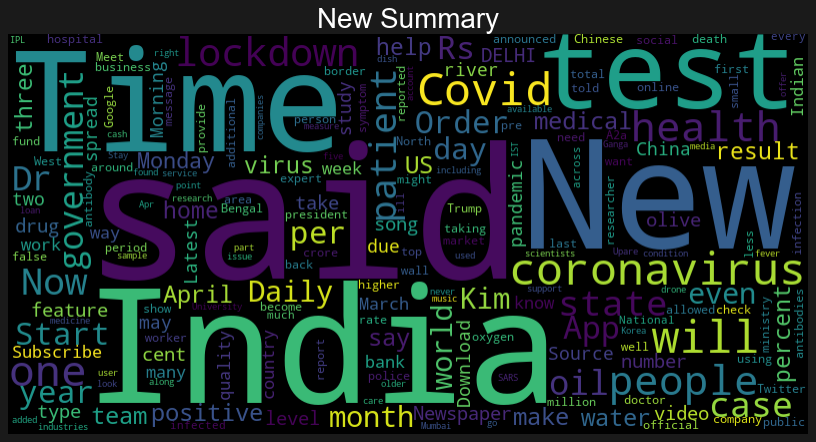

In [172]:
text = data.Text
#text
size = (10,7)
wordcloud = WordCloud(width=800, height=400,
                          collocations=False
                         ).generate(" ".join(text))
    
# Output Visualization
fig = plt.figure(figsize=size, dpi=80, facecolor='k',edgecolor='k')
plt.imshow(wordcloud,interpolation='bilinear')
plt.axis('off')
plt.title("New Summary", fontsize=25,color='w')
plt.tight_layout(pad=0)
plt.show()

## Convert the data into the UCI News Popularity Format

Add some feature in the data

In [173]:
data['n_tokens_title']= data['Title'].apply(lambda row: len(row.split(" ")))
data['n_tokens_content'] = data['Text'].apply(lambda row: len(row.split(" ")))

# train['question_text'].apply(lambda row: sum(1 for word in row.split(" ") if word in stopword))

data['n_unique_tokens']= data['Text'].apply(lambda row: len(set(row.split(" "))) / len(row.split(" ")))
data['n_non_stop_words']= data['Text'].apply(lambda row: sum(1 for word in row.split(" ") if not word in stopwords) / len(row.split(" ")))

data['n_non_stop_unique_tokens'] = data['Text'].apply(lambda row: sum(1 for word in list(set(row.split(" "))) if not word in stopwords) / len(row.split(" ")))
data['num_hrefs']= data['link'].apply(lambda row: Article(row, language="en").html.count('https://timesofindia.indiatimes.com'))





In [174]:
data.head()

,link,Title,Text,Summary,Keywords,num_imgs,num_videos,num_keywords,average_token_length,data_channel_is_lifestyle,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs
0,https://timesofindia.indiatimes.com/life-style...,"Virus likely to keep coming back each year, wa...",China’s top scientists said the novel coronavi...,China’s top scientists said the novel coronavi...,"['unlikely', 'spread', 'likely', 'virus', 'com...",30,0,14,6.571429,1,...,-0.5,-0.0500,0.333333,0.0,11,396,0.623737,0.626263,0.512626,0
1,https://timesofindia.indiatimes.com/world/rest...,Kim Jong Un News: Top theories on what's going...,1. Recovering From Surgery\n\n2. In 'Grave Dan...,Order NowSEOUL: The Day of the Sun — the April...,"['north', 'going', 'jong', 'whats', 'daily', '...",13,0,15,5.733333,0,...,-0.5,-0.0125,0.500000,0.5,16,1002,0.520958,0.651697,0.467066,0
2,https://timesofindia.indiatimes.com/videos/bus...,"Sensex up 743 points, Reliance gains 10% as Fa...","Apr 22, 2020, 07:46PM IST\n\nSource: ANI\n\nEq...","Apr 22, 2020, 07:46PM ISTSource: ANIEquity ben...","['points', 'reliance', 'nifty', 'stake', 'cent...",9,0,15,5.600000,0,...,-0.5,-0.0125,0.000000,0.0,13,158,0.651899,0.727848,0.537975,0
3,https://timesofindia.indiatimes.com/spotlight/...,Keen on getting an MBA? Start your journey thi...,Aspiring to build a career in healthcare manag...,Aspiring to build a career in healthcare manag...,"['lockdown', 'start', 'nmims', 'mba', 'journey...",14,0,15,6.600000,0,...,-0.5,-0.0125,0.000000,0.0,10,22,0.954545,0.636364,0.636364,0
4,https://timesofindia.indiatimes.com/videos/bea...,LIVA Miss Diva 2020 finalists at Bennett Unive...,"ETimes is an Entertainment, TV & Lifestyle ind...","ETimes is an Entertainment, TV & Lifestyle ind...","['diva', 'badminton', 'university', 'times', '...",5,0,19,6.736842,0,...,-0.5,-0.0125,0.000000,0.0,10,31,0.935484,0.838710,0.806452,0


# Model for online news Polarity Dataset
Link: https://www.kaggle.com/btphan/online-news-popularity-dataset

http://archive.ics.uci.edu/ml/datasets/Online+News+Popularity#

__Read the datafrom the data set and create a model__
__Use this model for our news virality__

In [175]:
# Read dataset 

X_train = pd.read_csv('OnlineNewsPopularity.csv')
print (X_train.shape)
X_train.head()

(39644, 61)


,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,...,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,...,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,...,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,...,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,...,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,...,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [176]:
#X_train['shares']
X_train.columns = X_train.columns.str.replace(' ', '')

In [177]:
y_train = X_train.shares
X_train = X_train.drop(['url', 'shares'], axis=1)
X_train.shape

(39644, 59)

In [178]:
X_train = X_train.drop(['timedelta', 'LDA_00','LDA_01','LDA_02','LDA_03','LDA_04','num_self_hrefs', 'kw_min_min', 
              'kw_max_min', 'kw_avg_min','kw_min_max', 'kw_max_max','kw_avg_max','kw_min_avg',
              'kw_max_avg','kw_avg_avg','self_reference_min_shares','self_reference_max_shares',
              'self_reference_avg_sharess','rate_positive_words','rate_negative_words',
              'abs_title_subjectivity','abs_title_sentiment_polarity'], axis = 1)

In [179]:
column_name = X_train.columns

In [180]:
data = data.drop(['Keywords', 'Summary', 'Text', 'Title', 'link'], axis = 1)
data.head()

,num_imgs,num_videos,num_keywords,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,...,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs
0,30,0,14,6.571429,1,0,0,0,1,0,...,-0.5,-0.0500,0.333333,0.0,11,396,0.623737,0.626263,0.512626,0
1,13,0,15,5.733333,0,0,0,0,0,1,...,-0.5,-0.0125,0.500000,0.5,16,1002,0.520958,0.651697,0.467066,0
2,9,0,15,5.600000,0,0,1,0,1,0,...,-0.5,-0.0125,0.000000,0.0,13,158,0.651899,0.727848,0.537975,0
3,14,0,15,6.600000,0,0,0,0,1,0,...,-0.5,-0.0125,0.000000,0.0,10,22,0.954545,0.636364,0.636364,0
4,5,0,19,6.736842,0,0,0,0,1,0,...,-0.5,-0.0125,0.000000,0.0,10,31,0.935484,0.838710,0.806452,0


### Data Standardization

In [188]:
from sklearn.preprocessing import StandardScaler


scaler = StandardScaler()
scaler.fit(X_train)
train_features = scaler.transform(X_train)
test_features = scaler.transform(data)
X_train[column_name] = train_features
data[column_name] = test_features

### Try Different Models
__Random Forest With K-fold Cross Validation__

In [185]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

kf = KFold(n_splits=5, shuffle=True, random_state=42)
rf = RandomForestRegressor(random_state=42)
scores = cross_val_score(rf, X_train, y_train, 
                         cv=kf, scoring='neg_mean_squared_error')
print(scores)
mean_score = scores.mean()
print(mean_score)


[-1.50325658e+08 -2.52291807e+08 -1.01801846e+08 -1.85754747e+08
 -1.36998260e+08]
-165434463.40170848


### LGBM Regression with Romdom SearchCV hyperparameter tuning


In [159]:
import warnings
warnings.filterwarnings('ignore')
from lightgbm import LGBMRegressor
from scipy.stats import uniform
from sklearn.model_selection import RandomizedSearchCV 
from scipy.stats import randint as sp_randint

lgb_model = LGBMRegressor(subsample=0.9)

params = {'learning_rate': uniform(0, 1),
          'n_estimators': sp_randint(200, 1500),
          'num_leaves': sp_randint(20, 200),
          'max_depth': sp_randint(2, 15),
          'min_child_weight': uniform(0, 2),
          'colsample_bytree': uniform(0, 1),
         }
lgb_random = RandomizedSearchCV(lgb_model, param_distributions=params, n_iter=10, cv=3, random_state=42, 
                                scoring='neg_mean_squared_error', verbose=10, return_train_score=True)
lgb_random = lgb_random.fit(X_train, y_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122 
[CV]  colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122, score=(train=-2782743.309, test=-264617049.202), total=  14.2s


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   16.2s remaining:    0.0s


[CV] colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122 
[CV]  colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122, score=(train=-2793066.312, test=-286009339.217), total=  14.4s


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:   32.8s remaining:    0.0s


[CV] colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122 
[CV]  colsample_bytree=0.3745401188473625, learning_rate=0.9507143064099162, max_depth=12, min_child_weight=1.5593820005455385, n_estimators=1244, num_leaves=122, score=(train=-93.865, test=-208479661.631), total=  14.2s


[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:   49.2s remaining:    0.0s


[CV] colsample_bytree=0.44583275285359114, learning_rate=0.09997491581800289, max_depth=12, min_child_weight=1.7323522915498704, n_estimators=1323, num_leaves=123 
[CV]  colsample_bytree=0.44583275285359114, learning_rate=0.09997491581800289, max_depth=12, min_child_weight=1.7323522915498704, n_estimators=1323, num_leaves=123, score=(train=-4845200.388, test=-188148547.869), total=  17.2s


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:  1.1min remaining:    0.0s


[CV] colsample_bytree=0.44583275285359114, learning_rate=0.09997491581800289, max_depth=12, min_child_weight=1.7323522915498704, n_estimators=1323, num_leaves=123 
[CV]  colsample_bytree=0.44583275285359114, learning_rate=0.09997491581800289, max_depth=12, min_child_weight=1.7323522915498704, n_estimators=1323, num_leaves=123, score=(train=-4437276.743, test=-192193425.970), total=  17.2s


[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:  1.5min remaining:    0.0s


[CV] colsample_bytree=0.44583275285359114, learning_rate=0.09997491581800289, max_depth=12, min_child_weight=1.7323522915498704, n_estimators=1323, num_leaves=123 
[CV]  colsample_bytree=0.44583275285359114, learning_rate=0.09997491581800289, max_depth=12, min_child_weight=1.7323522915498704, n_estimators=1323, num_leaves=123, score=(train=-778813.256, test=-78319524.812), total=  16.7s


[Parallel(n_jobs=1)]: Done   6 out of   6 | elapsed:  1.8min remaining:    0.0s


[CV] colsample_bytree=0.7080725777960455, learning_rate=0.020584494295802447, max_depth=3, min_child_weight=1.4439975445336495, n_estimators=1005, num_leaves=149 
[CV]  colsample_bytree=0.7080725777960455, learning_rate=0.020584494295802447, max_depth=3, min_child_weight=1.4439975445336495, n_estimators=1005, num_leaves=149, score=(train=-97879480.005, test=-172343334.443), total=   2.5s


[Parallel(n_jobs=1)]: Done   7 out of   7 | elapsed:  1.8min remaining:    0.0s


[CV] colsample_bytree=0.7080725777960455, learning_rate=0.020584494295802447, max_depth=3, min_child_weight=1.4439975445336495, n_estimators=1005, num_leaves=149 
[CV]  colsample_bytree=0.7080725777960455, learning_rate=0.020584494295802447, max_depth=3, min_child_weight=1.4439975445336495, n_estimators=1005, num_leaves=149, score=(train=-98027828.207, test=-178119967.840), total=   2.9s


[Parallel(n_jobs=1)]: Done   8 out of   8 | elapsed:  1.9min remaining:    0.0s


[CV] colsample_bytree=0.7080725777960455, learning_rate=0.020584494295802447, max_depth=3, min_child_weight=1.4439975445336495, n_estimators=1005, num_leaves=149 
[CV]  colsample_bytree=0.7080725777960455, learning_rate=0.020584494295802447, max_depth=3, min_child_weight=1.4439975445336495, n_estimators=1005, num_leaves=149, score=(train=-149549711.427, test=-57310414.143), total=   2.4s


[Parallel(n_jobs=1)]: Done   9 out of   9 | elapsed:  1.9min remaining:    0.0s


[CV] colsample_bytree=0.18182496720710062, learning_rate=0.18340450985343382, max_depth=13, min_child_weight=1.2233063209765618, n_estimators=452, num_leaves=108 
[CV]  colsample_bytree=0.18182496720710062, learning_rate=0.18340450985343382, max_depth=13, min_child_weight=1.2233063209765618, n_estimators=452, num_leaves=108, score=(train=-11304741.621, test=-187925937.812), total=   4.3s
[CV] colsample_bytree=0.18182496720710062, learning_rate=0.18340450985343382, max_depth=13, min_child_weight=1.2233063209765618, n_estimators=452, num_leaves=108 
[CV]  colsample_bytree=0.18182496720710062, learning_rate=0.18340450985343382, max_depth=13, min_child_weight=1.2233063209765618, n_estimators=452, num_leaves=108, score=(train=-10592647.845, test=-191639642.741), total=   4.3s
[CV] colsample_bytree=0.18182496720710062, learning_rate=0.18340450985343382, max_depth=13, min_child_weight=1.2233063209765618, n_estimators=452, num_leaves=108 
[CV]  colsample_bytree=0.18182496720710062, learning_ra

[Parallel(n_jobs=1)]: Done  30 out of  30 | elapsed:  3.6min finished


In [189]:
lgb_model.get_params

<bound method LGBMModel.get_params of LGBMRegressor(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
              importance_type='split', learning_rate=0.1, max_depth=-1,
              min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
              n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
              random_state=None, reg_alpha=0.0, reg_lambda=0.0, silent=True,
              subsample=0.9, subsample_for_bin=200000, subsample_freq=0)>

In [190]:
df1 = pd.DataFrame(lgb_random.cv_results_)
df1[['param_learning_rate', 'param_n_estimators', 'param_num_leaves', 'param_max_depth', 'param_min_child_weight', 'param_colsample_bytree', 'mean_train_score', 'mean_test_score']]

,param_learning_rate,param_n_estimators,param_num_leaves,param_max_depth,param_min_child_weight,param_colsample_bytree,mean_train_score,mean_test_score
0,0.950714,1244,122,12,1.55938,0.37454,-1.858634e+06,-2.530365e+08
1,0.0999749,1323,123,12,1.73235,0.445833,-3.353763e+06,-1.528890e+08
2,0.0205845,1005,149,3,1.444,0.708073,-1.151523e+08,-1.359266e+08
3,0.183405,452,108,13,1.22331,0.181825,-1.042317e+07,-1.532586e+08
4,0.611853,899,34,11,0.0933313,0.291229,-3.899666e+06,-1.947188e+08
5,0.785176,1467,83,4,0.764924,0.45607,-8.917028e+06,-2.065408e+08
6,0.85994,366,37,8,0.341048,0.466763,-7.888293e+06,-2.225033e+08
7,0.965632,764,149,3,0.770833,0.948886,-3.742312e+07,-2.013620e+08
8,0.440152,975,194,8,1.21999,0.684233,-2.118909e+06,-1.821781e+08
9,0.391061,1225,153,3,1.32504,0.173365,-5.536661e+07,-1.597375e+08


In [191]:
lgb_random.best_params_

{'colsample_bytree': 0.7080725777960455,
 'learning_rate': 0.020584494295802447,
 'max_depth': 3,
 'min_child_weight': 1.4439975445336495,
 'n_estimators': 1005,
 'num_leaves': 149}

In [192]:
print ("Best Score", lgb_random.best_score_)

Best Score -135926555.144997


In [193]:
best_params = lgb_random.best_params_
model = LGBMRegressor(**best_params, subsample=0.9, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

LGBMRegressor(boosting_type='gbdt', class_weight=None,
              colsample_bytree=0.7080725777960455, importance_type='split',
              learning_rate=0.020584494295802447, max_depth=3,
              min_child_samples=20, min_child_weight=1.4439975445336495,
              min_split_gain=0.0, n_estimators=1005, n_jobs=-1, num_leaves=149,
              objective=None, random_state=42, reg_alpha=0.0, reg_lambda=0.0,
              silent=True, subsample=0.9, subsample_for_bin=200000,
              subsample_freq=0)

In [194]:
score = model.predict(data)
print (score)

[21582.56597536 21140.27217771 12039.03210195 20185.36358059
 13907.37484749 17529.8921399  28488.64088135 12582.6355048
 21194.09447344 13702.57742616 21378.59521526 15896.73609331
 12512.51936967 25634.9988833  11451.48071773 18660.48023954
 27743.07099264 22163.95508356 21980.35343543 15525.64524141
 26820.78194306 16727.92921242 27219.1969939  18425.87963144
 20196.16495525 18981.06470758 26714.24434813 19640.79642304
 15899.6651294  15339.76775429 10641.07496848 15870.81157927
 16300.00552976 13514.5538228  16032.56614523 13586.20425875
 15073.34889952 22401.2912576  12795.08362881 11988.34302056
 17539.59798711 25181.68372647 23589.6632646  16737.63505963
 21673.34889222 17363.29087043 13586.20425875 13510.36835387
 27214.16608169 22224.81043792 21673.34889222 12582.6355048
  7080.83833184 17735.33654545 17562.32821142]


In [195]:
data['shares'] = score
data

,num_imgs,num_videos,num_keywords,average_token_length,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,...,max_negative_polarity,title_subjectivity,title_sentiment_polarity,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,shares
0,-0.432948,-0.249487,-0.519566,-0.476911,-0.449391,-0.478664,0.373623,-0.498107,0.872620,1.818474,...,1.065721,0.095206,-0.960449,-0.546872,-0.304268,-3.783847,-4.202109,4.229313,-0.465359,21582.565975
1,-0.432948,-0.249487,-0.519566,-0.476911,-0.449391,-0.478664,0.349590,-0.290267,2.354558,3.810757,...,0.905509,-0.211094,-0.960449,-0.546872,-0.304268,-3.260042,-5.386389,4.229313,-0.465359,21140.272178
2,2.309747,-0.249487,-0.519566,-0.476911,-0.449391,-0.478664,0.443630,-0.196847,5.788666,6.093581,...,0.880020,-0.211094,-0.960449,-0.426526,-0.304268,-3.783847,-4.202109,-0.236445,-0.465359,12039.032102
3,-0.432948,-0.249487,-0.519566,-0.476911,-0.449391,-0.478664,-0.480454,-0.473761,6.087903,6.218099,...,1.071182,-0.211094,-0.960449,-0.546872,-0.304268,-3.783847,-4.202109,4.229313,-0.465359,20185.363581
4,-0.432948,-0.249487,-0.519566,-0.476911,-0.449391,-0.478664,-0.480454,-0.473761,6.087903,6.218099,...,1.097341,-0.211094,-0.960449,-0.546872,-0.304268,-3.783847,-4.202109,-0.236445,2.148880,13907.374847
5,-0.432948,-0.249487,-0.519566,-0.476911,-0.449391,-0.478664,0.800455,0.781582,6.187649,6.218099,...,0.838847,-0.211094,-0.960449,-0.546872,-0.304268,-3.783847,-4.202109,4.229313,-0.465359,17529.892140
6,-0.432948,-0.249487,-0.519566,-0.476911,2.225232,2.089150,0.892965,0.423645,6.971367,6.259605,...,0.969229,-0.211094,-0.960449,-0.546872,-0.304268,-3.783847,-4.202109,-0.236445,-0.465359,28488.640881
7,-0.432948,-0.249487,-0.519566,-0.476911,-0.449391,-0.478664,0.577243,-0.295259,7.869080,6.923699,...,0.978975,-0.211094,-0.960449,-0.546872,-0.304268,-3.783847,-4.202109,4.229313,-0.465359,12582.635505
8,-0.432948,-0.249487,-0.519566,-0.476911,-0.449391,-0.478664,0.462084,-0.326453,10.391225,9.580076,...,0.901867,0.095206,-0.960449,-0.546872,-0.304268,-3.783847,-4.202109,4.229313,-0.465359,21194.094473
9,-0.432948,-0.249487,-0.519566,-0.476911,-0.449391,-0.478664,0.928546,0.172372,13.412099,12.734524,...,0.918253,-0.211094,-0.960449,-0.546872,-0.304268,-3.783847,-4.202109,4.229313,-0.465359,13702.577426
